# Statistical Learning and Deep Learning - Homework 2
#### B08705038 資管四 郭子麟

## 第一題 [Data Processing]
(10%) 資料前處理是一個重要的工作，本題將利用UCI的"Adult" dataset <https://archive.ics.uci.edu/ml/datasets/Adult>來練習資料前處理。我們使用這個資料集的方式是用來建構預測最後一個收入欄位是'>50K'或'<=50K'。這個資料集已經先切好了Training跟Test。我們將會沿用這個切割。

資料前處理包含以下工作:
* 生成以下numpy變數: x_train(訓練特徵)、y_train(訓練標籤)、x_test(測試特徵)、y_test(測試標籤)。用一個Dictionary組織將這些變數，其中Key為變數名稱，Value為之前生成的變數內容。
* 最後一欄為標籤，將'>50K'與'<=50K'轉成1跟0。其他欄位為特徵。
* 把所有含有缺值的Rows刪除。
* 所有數值欄位標準化(均數為0，變異數為1)。測試資料特徵需用訓練資料的均數與變異數標準化。
* 所有類別欄位(如native-country與workclass)都應使用"1-of-K"轉換成0與1的欄位。
* 我們只考慮在訓練資料中出現超過(含)10次的特徵值。如果一個特徵值出現不到10次，則刪除這個特徵值所對應的1-of-K欄位。
* 你可以使用sklearn中的工具函數進行1-of-K encoding與變數標準化。

### 讀檔並展示 dataframe 確認讀檔成功

In [10]:
import numpy as np
import pandas as pd

In [11]:
# create header list and read data to from a dataframe
headers = [
  'age', 
  'workclass', 
  'fnlwgt', 
  'education', 
  'educational-num', 
  'marital-status', 
  'occupation', 
  'relationship', 
  'race', 
  'gender', 
  'capital-gain', 
  'capital-loss', 
  'hours-per-week', 
  'native-country', 
  'income'
]

# because in the dataset, ? is used to represent missing values, we need to replace it with NaN
train_raw = pd.read_csv('adult.data', header=None, names=headers, na_values=['?'], skipinitialspace=True) # skipinitialspace=True is used to remove the space before the value
test_raw = pd.read_csv('adult.test', header=None, names=headers, skiprows=1, na_values=['?'], skipinitialspace=True) # first line is not data, so skip it

print("first 5 rows of train_raw:")
display(train_raw.head())

print("last 5 rows of train_raw:")
display(train_raw.tail())

print("first 5 rows of test_raw:")
display(test_raw.head())

print("last 5 rows of test_raw:")
display(test_raw.tail())

first 5 rows of train_raw:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


last 5 rows of train_raw:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


first 5 rows of test_raw:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


last 5 rows of test_raw:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


### 將'>50K'與'<=50K'轉成 1 跟 0 並把含有 NaN 的 row 刪除

In [12]:
train_raw['income'] = train_raw['income'].map({'<=50K': 0, '>50K': 1})
test_raw['income'] = test_raw['income'].map({'<=50K.': 0, '>50K.': 1})

train_raw.dropna(inplace=True, axis=0)
test_raw.dropna(inplace=True, axis=0)

### 所有數值欄位標準化(均數為0，變異數為1)。測試資料特徵需用訓練資料的均數與變異數標準化。

In [13]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
train_raw[numeric_features] = scaler.fit_transform(train_raw[numeric_features])
test_raw[numeric_features] = scaler.transform(test_raw[numeric_features])

### 所有類別欄位(如native-country與workclass)都應使用"1-of-K"轉換成0與1的欄位。

In [14]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
train_raw_with_dummies = pd.get_dummies(train_raw, columns=categorical_features)
test_raw_with_dummies = pd.get_dummies(test_raw, columns=categorical_features)

### 只考慮在訓練資料中出現超過(含) 10 次的特徵值。如果一個特徵值出現不到 10 次，則刪除這個特徵值所對應的 1-of-K 欄位。

In [15]:
categorical_features_dummies_to_remove = []
categorical_features_dummies_to_remove_for_test = []
# for all categorial columns in train_raw_with_dummies
for col in train_raw_with_dummies.columns:
    if col not in numeric_features and col != 'income':
		# if the feature appears less than 10 times, remove the column
        if train_raw_with_dummies[col].sum() < 10:
            categorical_features_dummies_to_remove.append(col)

print("features to remove:", categorical_features_dummies_to_remove)
train_raw_with_dummies.drop(categorical_features_dummies_to_remove, axis=1, inplace=True)
test_raw_with_dummies.drop(categorical_features_dummies_to_remove, axis=1, inplace=True, errors='ignore')

features to remove: ['occupation_Armed-Forces', 'native-country_Holand-Netherlands']


In [16]:
test_raw_with_dummies.shape, train_raw_with_dummies.shape

((15060, 103), (30162, 103))

### 生成 dictionary 並將 x_train, y_train, x_test, y_test 轉成 numpy array

In [17]:
y_train = train_raw_with_dummies['income'].values
y_test = test_raw_with_dummies['income'].values

# 按照 pickle 的 column 順序排列
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
reordered_train_raw_with_dummies = pd.DataFrame(columns=adult50kp['columnname'])
reordered_test_raw_with_dummies = pd.DataFrame(columns=adult50kp['columnname'])
for col in adult50kp['columnname']:
    reordered_train_raw_with_dummies[col] = train_raw_with_dummies[col]
    reordered_test_raw_with_dummies[col] = test_raw_with_dummies[col]

x_train = reordered_train_raw_with_dummies.to_numpy()
x_test = reordered_test_raw_with_dummies.to_numpy()
print(x_train.shape, x_test.shape)

(30162, 102) (15060, 102)


In [18]:
adult50k = {
	'x_train': x_train,
	'y_train': y_train,
	'x_test': x_test,
	'y_test': y_test,
}

### 與 pickle 檔進行比對，確認處理完的 data 與 pickle 相同

In [118]:
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

elems = ['x_train', 'x_test', 'y_train', 'y_test']

for aelem in elems:
    cnomatch = np.sum(adult50kp[aelem] != adult50k[aelem])
    if cnomatch == 0:
        print(aelem, "match!")
    else:
        print(aelem, "%d elements no match!" % cnomatch)

x_train match!
x_test match!
y_train match!
y_test match!


## 第二題 [ROC and AUC]
(35%) Receiver operation characteristic (ROC) 曲線以及其線下面積 (Area Under Curve; AUC) 為衡量分類器預測能力常用的工具。  
本題將練習繪製ROC以及計算AUC。在這之前我們必須載入資料，訓練模型，並進行預測：

In [123]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
# train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
# make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
# compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)    

Accuracy = 0.848340


### Q2.1 (17.5%): 基於 `adult50kp['y_test']` 與 `ypredprob` 繪製ROC Curve。

### Move a threshold on the sorted instances, and calculate corresponding confusion matrix for each threshold

In [124]:
def cal_confusion_matrix_return_4_values(y, ypred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(y.shape[0]):
        if y[i] == 1 and ypred[i] == 1:
            tp += 1
        elif y[i] == 0 and ypred[i] == 0:
            tn += 1
        elif y[i] == 0 and ypred[i] == 1:
            fp += 1
        elif y[i] == 1 and ypred[i] == 0:
            fn += 1
    return tp, tn, fp, fn

In [125]:
dict = {
    'y_test': adult50kp['y_test'],
    'y_pred_pos': ypredprob[:,1],
}
instances = pd.DataFrame(dict)
instances.sort_values(by=['y_pred_pos'], ascending=False, inplace=True)
instances.reset_index(drop=True, inplace=True)

# define fpr_tpr list, for every element, it is a array of [fpr, tpr]
fpr_tpr = []
# do first new prediction based on first threshold
tp, fp, tn, fn = 0, 0, 0, 0
threshold = instances['y_pred_pos'][0]
y_pred_new = instances['y_pred_pos'].map(lambda x: 1 if x >= threshold else 0)
tp, tn, fp, fn = cal_confusion_matrix_return_4_values(instances['y_test'], y_pred_new)
print(f"tp, tn, fp, fn = {tp}, {tn}, {fp}, {fn}")
fpr_tpr.append([fp/(fp+tn), tp/(tp+fn)])

for i in range(instances.shape[0]):
    # 每次多一個 predict positive 因此要看 true class
    if instances['y_test'][i] > 0:
        tp += 1
        fn -= 1
    else:
        fp += 1
        tn -= 1
    fpr_tpr.append([fp/(fp+tn), tp/(tp+fn)])


tp, tn, fp, fn = 1, 11360, 0, 3699


### Plot the ROC curve based on false positive rate and true positive rate

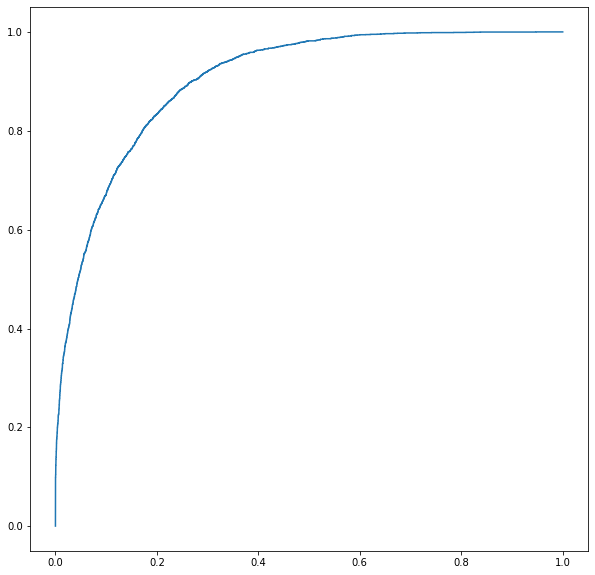

In [126]:
# plot ROC curve by fpr_tpr
import matplotlib.pyplot as plt
# make graph larger

# sort fpr_tpr by fpr
fpr_tpr.sort(key=lambda x: x[0])
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot([x[0] for x in fpr_tpr], [x[1] for x in fpr_tpr])

### Q2.2 (17.5%): 計算繪製出的 ROC Curve 的 AUC。

In [129]:
# count AUC based on fpr_tpr
# sort fpr_tpr by fpr
fpr_tpr.sort(key=lambda x: x[0])
auc = 0
for i in range(len(fpr_tpr)-1):
    auc += (fpr_tpr[i+1][0] - fpr_tpr[i][0]) * (fpr_tpr[i+1][1] + fpr_tpr[i][1]) / 2
print(f"AUC = {auc}")

AUC = 0.9037639179673276


## 第三題 [Logistic Regression with L2 Regularization]

### Q3.1 (15%) Derive the gradient and hessian matrix for the new E(w).
<img src="q3-1_handwriting.jpg" width="1200">

### Q3.2 (25%) Create your mylogistic_l2 class. Train your model and show the learned $w$ as well as test accuracy for the cases below. If $w$ is too long for you, show selected $w$ for continuous-valued, binary-valued, and the constant term.  
* Case 1: lambda = 1 for all coefficients
* Case 2: lambda = 1 for all but the intercept, no regularization for intercept term.
* Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term.

### Q3.3 (10%) Further split the training data into subtraining (90%) and tuning (10%) to search for the best hyperparameters. Set the regularization coefficient for the constant term to zero. Allow different regularizations for continuous-valued and binary-valued features. Let $a_1$ and $a_2$ denote the regularization coefficients for continuous-valued and binary-valued features. Search the best $a_1$ and $a_2$ and report the test accuracy using the best hyper-parameters. You should follow the following procedure to search for the best hyperparameters. 
1. Choose a set of grids among a reasonable range. For example, 10 grids in [0.01, 100]. 
2. Conduct grid search with the constraint that $a_1 = a_2$. Record the best value $a_1^*$ and $a_2^*$.
3. Fix $a_1 = a_1^*$, and search $a_2$ for the best value, call the result the new $a_2^*$. 
4. Fix $a_2 = a_2^*$, and search $a_1$ for the best value.
5. Report the selected $a_1$ and $a_2$.
6. Train a model using the selected hyper-parameters, and report the test accuracy.

### Q3.4 (5%) Use sklearn.linear_model.LogisticRegression to train and test the model (including hyperparameter tuning). Compare the estimated parameters and test accuracy with those from your own models.